In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import SGD, schedules
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

In [131]:
filenames = os.listdir(r"D:\JH\cnn_multi\train")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'good':
        categories.append(1)
    elif category == 'etc':
        categories.append(2)
    elif category == 'line':
        categories.append(3)    
    else:
        categories.append(0)

df= pd.DataFrame({
    'filename': filenames,
    'category': categories})

In [132]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3308745569007632561
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7129736807
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6944691411446483016
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 7129736807
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6586368799784396405
physical_device_desc: "device: 1, name: GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [133]:
df.head()

,filename,category
0,circle_8mpass1_Pass (1).png,0
1,circle_8mpass1_Pass (10).png,0
2,circle_8mpass1_Pass (100).png,0
3,circle_8mpass1_Pass (1000).png,0
4,circle_8mpass1_Pass (10000).png,0


In [134]:
df.tail(10)

,filename,category
78863,line_8mpass2_Pass (990).png,3
78864,line_8mpass2_Pass (991).png,3
78865,line_8mpass2_Pass (992).png,3
78866,line_8mpass2_Pass (993).png,3
78867,line_8mpass2_Pass (994).png,3
78868,line_8mpass2_Pass (995).png,3
78869,line_8mpass2_Pass (996).png,3
78870,line_8mpass2_Pass (997).png,3
78871,line_8mpass2_Pass (998).png,3
78872,line_8mpass2_Pass (999).png,3


<AxesSubplot:>

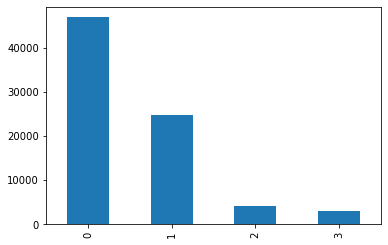

In [135]:
df['category'].value_counts().plot.bar()

In [136]:
model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape = (200, 200, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

initial_learning_rate = 0.00001
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.96,
    staircase=True)

model.compile(
    optimizer=SGD(learning_rate=lr_schedule),
    loss ='categorical_crossentropy',
    metrics = ['accuracy'])


In [137]:
df["category"]=df["category"].replace({0: 'circle', 1: 'good', 2: 'etc', 3: 'line'})

train_df, validate_df = train_test_split(df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_val = validate_df.shape[0]


<AxesSubplot:>

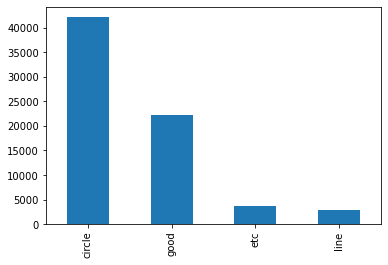

In [138]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

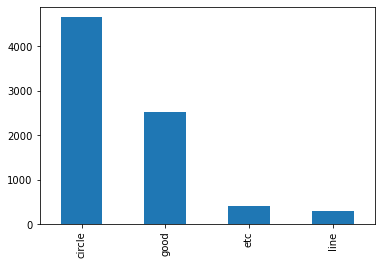

In [139]:
validate_df['category'].value_counts().plot.bar()

In [114]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

TARGET_SIZE=(200, 200)
BATCH_SIZE=64

train_set = train_datagen.flow_from_dataframe(
    train_df,
    r"D:\JH\cnn_multi\train",
    x_col='filename',
    y_col='category',
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical')


val_set = val_datagen.flow_from_dataframe(
    validate_df,
    r"D:\JH\cnn_multi\train",
    x_col='filename',
    y_col='category',
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical')


Found 70985 validated image filenames belonging to 4 classes.
Found 7888 validated image filenames belonging to 4 classes.


In [140]:
hist=model.fit(
    train_set,
    epochs = 30,
    validation_data = val_set,
    shuffle=True)

model.summary()

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1110 steps, validate for 124 steps
Epoch 1/30
1110/1110 [==============================] - 1243s 1s/step - loss: 0.9116 - accuracy: 0.6752 - val_loss: 0.7881 - val_accuracy: 0.7428
Epoch 2/30
1110/1110 [==============================] - 479s 432ms/step - loss: 0.7397 - accuracy: 0.7591 - val_loss: 0.7244 - val_accuracy: 0.7722
Epoch 3/30
1110/1110 [==============================] - 475s 428ms/step - loss: 0.7049 - accuracy: 0.7745 - val_loss: 0.6953 - val_accuracy: 0.7814
Epoch 4/30
1110/1110 [==============================] - 526s 474ms/step - loss: 0.6836 - accuracy: 0.7807 - val_loss: 0.6809 - val_accuracy: 0.7854
Epoch 5/30
1110/1110 [==============================] - 523s 471ms/step - loss: 0.6693 - accuracy: 0.7836 - val_loss: 0.6670 - val_accuracy: 0.7896
Epoch 6/30
1110/1110 [==============================] - 473s 426ms/step - loss: 0.6604 - accuracy: 0.7864 - val_loss: 0.6590 - val_accuracy: 0.7903
Epoch 7/30
1110/111

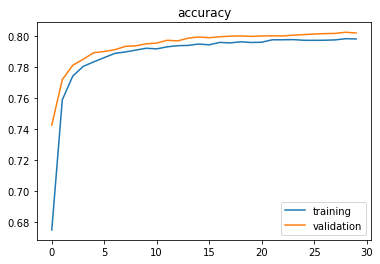

In [143]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['training', 'validation'], loc = 'lower right')

plt.show()

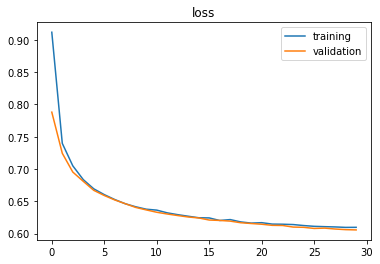

In [144]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['training', 'validation'], loc = 'upper right')
plt.show()

In [142]:
model.save_weights("model.h5")

In [120]:
test_filenames = os.listdir(r"D:\JH\cnn_multi\test")
test_df = pd.DataFrame({
    'filename':test_filenames
})
nb_samples = test_df.shape[0]


In [121]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_dataframe(
    test_df,
    r"D:\JH\cnn_multi\test",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False)


Found 938 validated image filenames.


In [122]:
test_loss, test_accuracy = model.evaluate(
    test_set, steps=np.ceil(nb_samples/BATCH_SIZE), verbose=1)

 1/15 [=>............................] - ETA: 0s

IndexError: tuple index out of range

In [123]:
predict = model.predict(test_set, steps=np.ceil(nb_samples/BATCH_SIZE))
test_df['category'] = np.argmax(predict, axis=1)
#label_map = dict((v,k) for k,v in train_set.class_indices.items())
#test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({0: 'good', 1: 'circle', 2: 'line', 3: 'etc'})

for test_idx in range(nb_samples):
    print(predict[test_idx])

[0.71390665 0.05419166 0.19732803 0.03457361]
[0.5899844  0.15764044 0.23740073 0.01497438]
[0.75365347 0.05567662 0.16963543 0.02103444]
[0.71696573 0.05572552 0.20366646 0.02364233]
[0.9002393  0.02956225 0.0449686  0.02522984]
[0.89910996 0.02632542 0.06391192 0.01065264]
[0.72927964 0.04747687 0.19343437 0.02980915]
[0.9335084  0.01177033 0.05248231 0.00223906]
[0.7469509  0.05812836 0.17554562 0.01937505]
[0.9019126  0.05120633 0.04112568 0.00575545]
[0.8781818  0.02943857 0.07646655 0.01591314]
[0.9070454  0.06186665 0.02465889 0.00642911]
[0.59767526 0.0578058  0.2926225  0.05189645]
[0.7928794  0.06265126 0.13257496 0.01189431]
[0.8902211  0.06606645 0.03740803 0.00630439]
[0.9159068  0.06442826 0.01633871 0.00332615]
[0.8838413  0.04678949 0.05240571 0.01696351]
[0.7107127  0.0584925  0.20589972 0.02489515]
[0.6757092  0.01831789 0.26323476 0.04273816]
[0.85437125 0.06540971 0.05867977 0.02153931]
[0.9405237  0.03450606 0.02094711 0.00402314]
[0.6898143  0.07300325 0.20461975 

[0.74635226 0.06179371 0.17320901 0.01864504]
[0.7631036  0.03489386 0.18046828 0.02153427]
[0.70152843 0.05269011 0.20842876 0.03735273]
[0.34611517 0.03353179 0.59557354 0.02477945]
[0.94041204 0.01985917 0.03535566 0.00437306]
[0.82841295 0.02565341 0.12453754 0.02139615]
[0.888356   0.01858729 0.08112883 0.01192789]
[0.74192756 0.03654813 0.2075126  0.01401165]
[0.792836   0.03748798 0.14844202 0.02123395]
[0.7714058  0.04825804 0.16361994 0.01671621]
[0.75709265 0.06508782 0.13370787 0.04411167]
[0.72397274 0.04215747 0.20894866 0.02492112]
[0.72050714 0.03592307 0.22886315 0.01470672]
[0.68472207 0.04526727 0.24791054 0.02210021]
[0.71367407 0.03481422 0.22230904 0.02920272]
[0.73353493 0.03704629 0.20872195 0.02069684]
[0.77981776 0.04651906 0.15830417 0.01535904]
[0.69797575 0.0452344  0.22768381 0.02910604]
[0.7594068  0.0444895  0.18282136 0.0132823 ]
[0.78118306 0.03766878 0.15850669 0.02264141]
[0.70865494 0.04478185 0.22057758 0.02598562]
[0.74657995 0.05335995 0.18423451 

<AxesSubplot:>

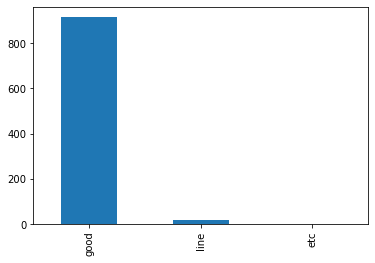

In [124]:
test_df['category'].value_counts().plot.bar()

In [324]:
# cnn model로 test data를 추정한 결과값을 저장
test_data = test_set
#test_data = test_data[:,:,:, np.newaxis].astype('float32')
predicted_result = model.predict(test_data)

In [329]:
# wrong example check
# cnn model로 test data를 추정한 결과값을 저장
import random
#/255 중복으로 normalization 여러번 하면 오류 생김
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_result = []
for n in range(0, (len(test_labels_new))):
    if predicted_labels[n] != test_labels_new[n]:
        wrong_result.append(n)
        samples = random.choices(population=wrong_result, k=16)
        count = 0
        nrows = ncols = 4
        plt.figure(figsize=(12,8))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_data[n].reshape(120, 128))
    tmp = "Label:" + str(test_labels_new[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
    plt.tight_layout()
    plt.show()
print("wrongly classified cases: ")
print(len(wrong_result))


NameError: name 'test_labels_new' is not defined

In [262]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("D:\\JH\\test_sc"+filename, target_size=TARGET_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\JH\\test_sccircle_Stain (1).png'

<Figure size 864x1728 with 0 Axes>

In [330]:
print(label_map)

{0: 'circle', 1: 'good'}
